In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import UnitarySimulator

### Hadamard Gate -1 qubit

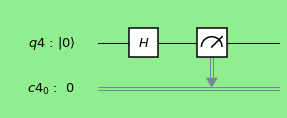

In [10]:
n =1
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

- Initial state: |0>
- After Hadamard Gate: $\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$
------
Tensor Algebra:

- H = $\frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}$

- |1> = $\begin{bmatrix}
    1  \\
    0
\end{bmatrix}$ ; |0> = $\begin{bmatrix}
    0\\
    1
\end{bmatrix}$


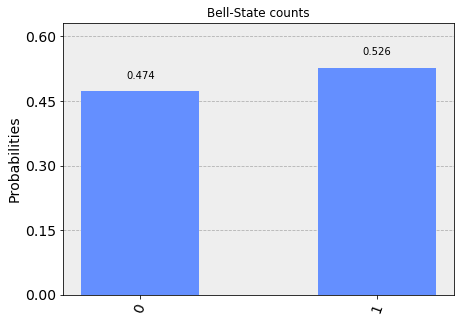

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

-  Generate Unitary Matrix for the circuit

In [12]:
n =1
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print( unitary)


[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


### Hadamard Gate 2-qubit

$I \otimes H  =  \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 & 0 & 0\\
1 & -1 & 0 & 0\\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{bmatrix} $

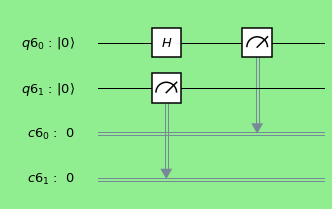

In [13]:
n =2
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

In [14]:
n =2
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print( unitary)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


----------

$H \otimes I  = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \otimes \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix} $

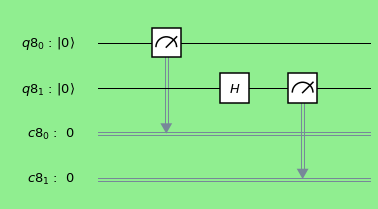

In [15]:
n =2
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[1])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

In [16]:
n =2
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[1])
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print( unitary)

[[ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j -0.70710678+0.j]]


----------

$H \otimes H $

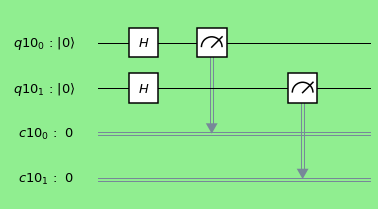

In [17]:
n =2
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.h(q[1])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

Manual Approach

---------
- Initial state: |00>
- After Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$
- After Hadamard Gate: $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$

---------
- This is tensor product of two Hedamard transform:
$H|0>_A \otimes H|0>_B$
- i.e., $(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) \otimes (\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) = \frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$




Tensor Algebra: [source](https://quantumcomputing.stackexchange.com/questions/2270/how-to-input-2-qubits-in-2-hadamard-gates)

---------

- H operator in product space, $H_2 = H_1 \otimes H_1$ :

$\frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix}$

- Basis States in product space, $|q_1q_2> = q_1 \otimes q_2$ : 

|00> = $\begin{bmatrix}
    1  \\
    0 \\
    0\\
    0
\end{bmatrix}$ ; |01> = $\begin{bmatrix}
    0\\
    1\\
    0\\
    0
\end{bmatrix}$ ; |10> = $\begin{bmatrix}
    0  \\
    0 \\
    1\\
    0
\end{bmatrix}$ ; |11> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    1
\end{bmatrix}$

Linear transformation in product space:

---------

- Above transformation can be represented as :

$H_2|00>$ = $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$

- With above basis vector a atate $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$ can be expressed as: $\begin{bmatrix}
    \frac{1}{2} \\
    \frac{1}{2} \\
    \frac{1}{2}\\
    \frac{1}{2}
\end{bmatrix}$ 

Thus in Matrix Form:

$\frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix}$ $\begin{bmatrix}  
    1  \\
    0 \\
    0\\
    0
    \end{bmatrix}$
    = $\begin{bmatrix}
    \frac{1}{2} \\
    \frac{1}{2} \\
    \frac{1}{2}\\
    \frac{1}{2}
\end{bmatrix}$

- Tensor product of linear map:
----------
The tensor product also operates on linear maps between vector spaces. Specifically, given two linear maps $𝑆:𝑉→𝑋$ and $𝑇:𝑊→𝑌$ between vector spaces, the tensor product of the two linear maps 𝑆 and 𝑇 is a linear map
- $(𝑆⊗𝑇)(𝑣⊗𝑤)=𝑆(𝑣)⊗𝑇(𝑤)$.

Thus

- $(H|0>_A)\otimes(H|0>_B) = (H \otimes H)(|0>_A\otimes|0>_B)$
    

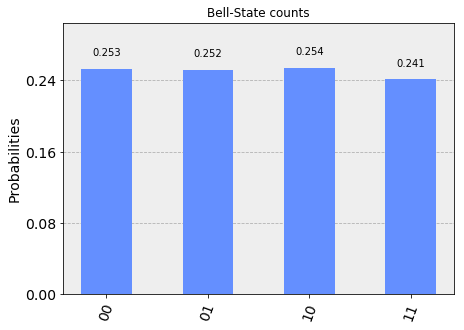

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

-  Generate Unitary Matrix for the circuit

In [19]:
n =2
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.h(q[1])
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print( unitary)

[[ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]]


### Hadamard Gate 3-Qubit

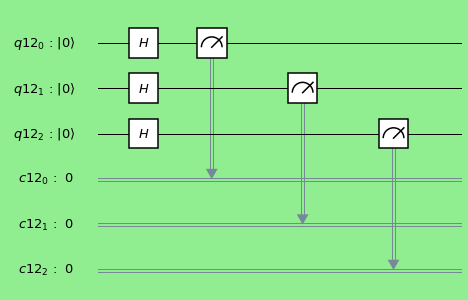

In [20]:
n = 3
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

Manual Approach

---------
- Initial state: |000>
- After Hadamard gate on first qubit: $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|100>$
- After Hadamard gate on second qubit: $\frac{1}{{2}}|000> + \frac{1}{{2}}|010>  +  \frac{1}{{2}}|100> + \frac{1}{{2}}|110>$
- After Hadamard gate on third qubit: 

$\frac{1}{2\sqrt{2}}(|000>  + |001> + |010> + |011>  +  |100> +  |101> + |110> + |111>) $

which is equivalent to 

$(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) \otimes (\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) \otimes (\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) $

Tensor Algebra: [source](https://quantumcomputing.stackexchange.com/questions/2270/how-to-input-2-qubits-in-2-hadamard-gates)

---------
- H operator in product space: $H_3 = H_1 \otimes H_1 \otimes H_1  = H_2 \otimes H_1$:

$\frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix}  = \frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix}$

=  $\frac{1}{2\sqrt{2}} \begin{bmatrix}
    1  &   1  &  1  &   1  &  1  &   1  &  1  &   1 \\
    1  &  -1  &  1  &  -1  &  1  &  -1  &  1  &  -1 \\
    1  &   1  & -1  &  -1  &  1  &   1  & -1  &  -1 \\
    1  &  -1  & -1  &   1  &  1  &  -1  & -1  &   1 \\
    1  &   1  &  1  &   1  &  -1  & -1  &  -1  & -1 \\
    1  &  -1  &  1  &  -1  &  -1  &  1  &  -1  &  1 \\
    1  &   1  & -1  &  -1  &  -1  &   -1  &  1  &   1 \\
    1  &  -1  & -1  &   1  &  -1  &    1  &  1  &  -1 \\
\end{bmatrix}$



- Basis states in product space: $ |q_1q_2q_3> = q_1 \otimes q_2 \otimes q_3$ : 
    
|000> = $\begin{bmatrix}
    1  \\
    0 \\
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
\end{bmatrix}$ ; |001> = $\begin{bmatrix}
    0\\
    1\\
    0\\
    0\\
    0\\
    0\\
    0\\
    0
\end{bmatrix}$; |010> = $\begin{bmatrix}
    0\\
    0\\
    1\\
    0\\
    0\\
    0\\
    0\\
    0
\end{bmatrix}$; |011> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    1\\
    0\\
    0\\
    0\\
    0
\end{bmatrix}$;

|100> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    0\\
    1\\
    0\\
    0\\
    0
\end{bmatrix}$; |101> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    0\\
    0\\
    1\\
    0\\
    0
\end{bmatrix}$; |110> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
    1\\
    0
\end{bmatrix}$; |111> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
    1
\end{bmatrix}$; 

Above transformation can be represented as :

$H_3|000>$ = $\frac{1}{2\sqrt{2}}|000>  + \frac{1}{2\sqrt{2}}|001> + \frac{1}{2\sqrt{2}}|010> + \frac{1}{2\sqrt{2}}|011>  +  \frac{1}{2\sqrt{2}}|100> +  \frac{1}{2\sqrt{2}}|101> + \frac{1}{2\sqrt{2}}|110> + \frac{1}{2\sqrt{2}}|111>$

- With above basis vector a state $\frac{1}{2\sqrt{2}}|000>  + \frac{1}{2\sqrt{2}}|001> + \frac{1}{2\sqrt{2}}|010> + \frac{1}{2\sqrt{2}}|011>  +  \frac{1}{2\sqrt{2}}|100> +  \frac{1}{2\sqrt{2}}|101> + \frac{1}{2\sqrt{2}}|110> + \frac{1}{2\sqrt{2}}|111>$ can be expressed as:

$\begin{bmatrix}
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}}
\end{bmatrix}$ 

Thus in Matrix Form:

$H_3|000> = \frac{1}{2\sqrt{2}} \begin{bmatrix}
    1  &   1  &  1  &   1  &  1  &   1  &  1  &   1 \\
    1  &  -1  &  1  &  -1  &  1  &  -1  &  1  &  -1 \\
    1  &   1  & -1  &  -1  &  1  &   1  & -1  &  -1 \\
    1  &  -1  & -1  &   1  &  1  &  -1  & -1  &   1 \\
    1  &   1  &  1  &   1  &  -1  & -1  &  -1  & -1 \\
    1  &  -1  &  1  &  -1  &  -1  &  1  &  -1  &  1 \\
    1  &   1  & -1  &  -1  &  -1  &   -1  &  1  &   1 \\
    1  &  -1  & -1  &   1  &  -1  &    1  &  1  &  -1 \\
\end{bmatrix}$ $\begin{bmatrix}  
    1  \\
    0 \\
    0\\
    0\\
    0\\
    0\\
    0\\
    0
    \end{bmatrix}
    = \begin{bmatrix}
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}}
\end{bmatrix} $

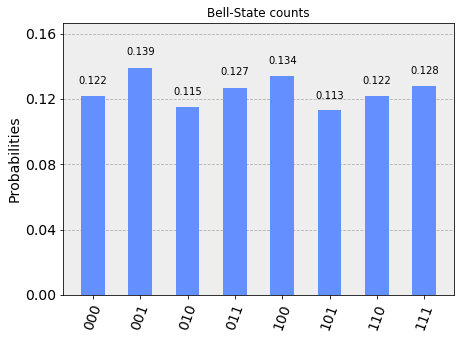

In [21]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

-  Generate Unitary Matrix for the circuit

In [22]:
n =3
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print( unitary)

[[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
   0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
   0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
   0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j
   0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
  -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
  -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j
  -

### Hadamard -10 Qubit

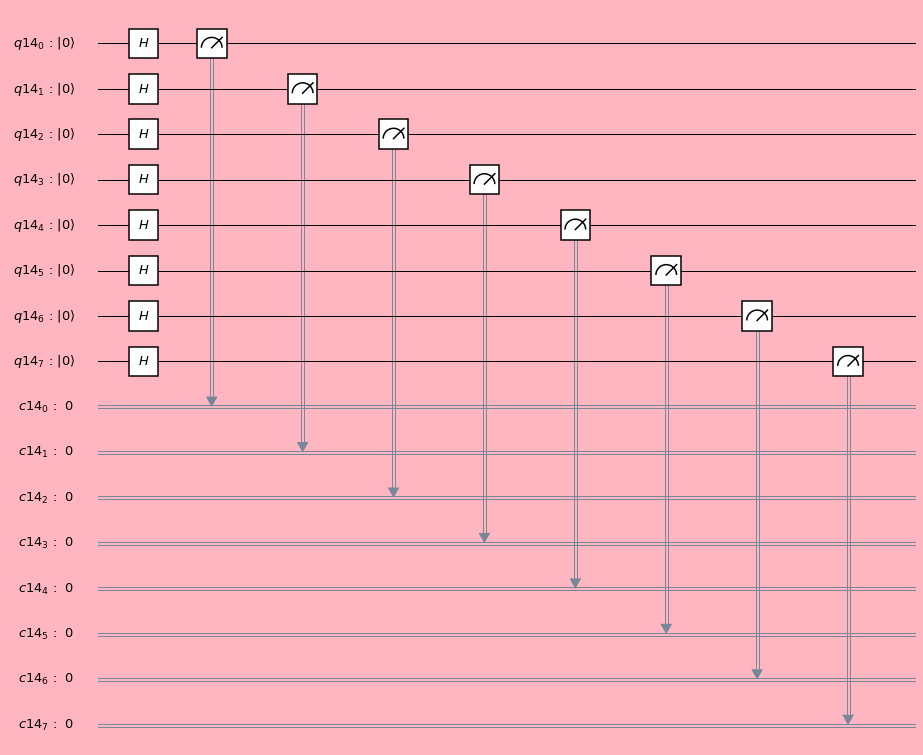

In [23]:
n = 8
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
for k in range(8):
    circ.h(q[k])
    
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightpink'}
circ.draw(output='mpl', style = style)

- Total 256 states

In [24]:
simulator = Aer.get_backend('qasm_simulator')

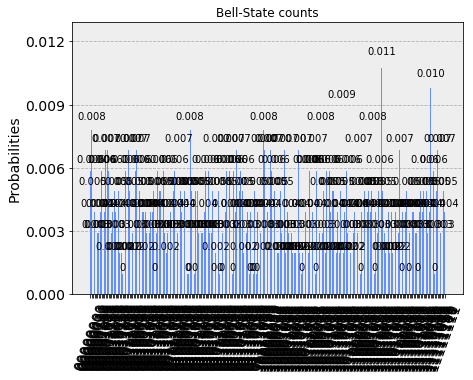

In [25]:
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

-  Generate Unitary Matrix for the circuit

In [26]:
n =8
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)

for k in range(8):
    circ.h(q[k])
    
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print( unitary)

[[ 0.0625+0.j  0.0625+0.j  0.0625+0.j ...  0.0625+0.j  0.0625+0.j
   0.0625+0.j]
 [ 0.0625+0.j -0.0625+0.j  0.0625+0.j ... -0.0625+0.j  0.0625+0.j
  -0.0625+0.j]
 [ 0.0625+0.j  0.0625+0.j -0.0625+0.j ...  0.0625+0.j -0.0625+0.j
  -0.0625+0.j]
 ...
 [ 0.0625+0.j -0.0625+0.j  0.0625+0.j ... -0.0625+0.j  0.0625+0.j
  -0.0625+0.j]
 [ 0.0625+0.j  0.0625+0.j -0.0625+0.j ...  0.0625+0.j -0.0625+0.j
  -0.0625+0.j]
 [ 0.0625+0.j -0.0625+0.j -0.0625+0.j ... -0.0625+0.j -0.0625+0.j
   0.0625+0.j]]


In [27]:
unitary.shape

(256, 256)

The End